# Практическая работа №3
## Королев Павел Александрович

# Цель:
знакомство с методами поиска ассоциативных правил,
формирование навыков выполнения поиска ассоциативных правил
на языке Python.
# Задачи:
Выполнение практической работы предполагает решение
следующий задач:
1. Подготовка исходных данных
2. Генерация частных наборов данных
3. Генерация ассоциативных правил

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
from apyori import apriori
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
data_copy = data.copy(deep=True)
data_copy

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

### Взял вариант с France, вторая Switzerland

In [4]:
data_France = data_copy.loc[data_copy['Country'] == 'France']
data_France

InvoiceNo StockCode                      Description  Quantity  \
26        536370     22728        ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727        ALARM CLOCK BAKELIKE RED         24   
28        536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
29        536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
30        536370     21883                 STARS GIFT TAPE         24   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
26     2010-12-01 08:45:00       3.75     12583.0  France  
27     2010-12-01 08:45:00       3.75     12583.0  France  
28     2010-12-01 08:45:00       3.75     12583.0  France  
29     2010-12-01 08:45:00       0.85     12583.0  France  
30     2010-12-01 08:45:00       0.65     12583.0  France  
...                    ...        ...         ...     ...  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France  

[8557 rows x 8 columns]

In [5]:
data_Switzerland = data_copy.loc[data_copy['Country'] == 'Switzerland']
data_Switzerland

InvoiceNo StockCode                          Description  Quantity  \
5320      536858     22326  ROUND SNACK BOXES SET OF4 WOODLAND         30   
5321      536858     22554     PLASTERS IN TIN WOODLAND ANIMALS        36   
5322      536858     21731        RED TOADSTOOL LED NIGHT LIGHT        24   
5323      536858     20677                   PINK POLKADOT BOWL        16   
5324      536858     20750             RED RETROSPOT MINI CASES         2   
...          ...       ...                                  ...       ...   
508666    579259     22915        ASSORTED BOTTLE TOP  MAGNETS         12   
508667    579259     23178                     JAM CLOCK MAGNET         6   
508668    579259     23180                  MUM'S KITCHEN CLOCK         4   
508669    579259     23079             TOADSTOOL BEDSIDE LIGHT          2   
508670    579259      POST                              POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID      Country  
5320   2010-12-03 10:36:00       2.95     13520.0  Switzerland  
5321   2010-12-03 10:36:00       1.65     13520.0  Switzerland  
5322   2010-12-03 10:36:00       1.65     13520.0  Switzerland  
5323   2010-12-03 10:36:00       1.25     13520.0  Switzerland  
5324   2010-12-03 10:36:00       7.95     13520.0  Switzerland  
...                    ...        ...         ...          ...  
508666 2011-11-29 08:40:00       0.42     12451.0  Switzerland  
508667 2011-11-29 08:40:00       2.89     12451.0  Switzerland  
508668 2011-11-29 08:40:00       4.95     12451.0  Switzerland  
508669 2011-11-29 08:40:00       8.95     12451.0  Switzerland  
508670 2011-11-29 08:40:00      40.00     12451.0  Switzerland  

[2002 rows x 8 columns]

### Чистим данные

In [6]:
data_France.describe()

Quantity    UnitPrice    CustomerID
count  8557.000000  8557.000000   8491.000000
mean     12.911067     5.028864  12677.995996
std      21.425031    79.909126    276.742088
min    -250.000000     0.000000  12413.000000
25%       5.000000     1.250000  12571.000000
50%      10.000000     1.790000  12674.000000
75%      12.000000     3.750000  12689.000000
max     912.000000  4161.060000  14277.000000

In [7]:
data_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8557 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8557 non-null   object        
 1   StockCode    8557 non-null   object        
 2   Description  8557 non-null   object        
 3   Quantity     8557 non-null   int64         
 4   InvoiceDate  8557 non-null   datetime64[ns]
 5   UnitPrice    8557 non-null   float64       
 6   CustomerID   8491 non-null   float64       
 7   Country      8557 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 601.7+ KB


In [8]:
data_France['InvoiceNo'].unique()

array([536370, 536852, 536974, 537065, 537463, 537468, 537693, 'C537893',
       537897, 537967, 538008, 538093, 538196, 539050, 'C539104', 539113,
       'C539114', 539407, 539435, 539551, 539607, 539688, 539727, 539829,
       'C540151', 'C540156', 540178, 540239, 540351, 540365, 'C540367',
       540455, 540463, 540521, 540642, 540688, 540789, 540824, 540835,
       540851, 'C540853', 540972, 540976, 541120, 541121, 541138, 541405,
       541567, 541631, 'C541688', 'C541825', 541857, 541981, 'C542088',
       'C542089', 542132, 'C542271', 542425, 542433, 542535, 542629,
       'C542714', 542735, 542904, 542922, 543030, 543188, 543459, 543484,
       543625, 'C543834', 'C543992', 544069, 544115, 'C544117', 544200,
       544355, 'C544422', 544423, 544470, 544585, 'C544609', 'C544679',
       544817, 544818, 545051, 545086, 545105, 545180, 545181, 545235,
       545301, 545515, 545517, 545583, 'C545837', 'C545997', 546373,
       546428, 546479, 'C546559', 546678, 546765, 546770, 5470

### Да вроде нормально... Пора объеденять

In [9]:
transactions_france = data_France.groupby(by='InvoiceNo').apply(lambda x: list(x.Description))
transactions_france

InvoiceNo
536370     [ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
536852     [PICTURE DOMINOES, MINI JIGSAW SPACEBOY, MINI ...
536974     [EDWARDIAN PARASOL BLACK, EDWARDIAN PARASOL PI...
537065     [HOT WATER BOTTLE BABUSHKA , BREAD BIN DINER S...
537463     [JAM MAKING SET PRINTED, SET/4 SKULL BADGES, R...
                                 ...                        
C579532        [POSTAGE, NOVELTY BISCUITS CAKE STAND 3 TIER]
C579562    [RABBIT NIGHT LIGHT, RED TOADSTOOL LED NIGHT L...
C580161                                            [POSTAGE]
C580263    [Manual, Manual, HI TEC ALPINE HAND WARMER, CA...
C581316    [GLASS  SONGBIRD STORAGE JAR, RED RETROSPOT SU...
Length: 461, dtype: object

In [10]:
min_lift = 0.1  # Минимальный подъем
min_supp = 0.1  # Минимальная поддержка
min_conf = 0.1  # Минимальная уверенность

# Метод априори для поиска ассоциативных правил
ap = list(apriori(transactions=transactions_france, 
                  min_support=min_supp, 
                  min_confidence=min_conf, 
                  min_lift=min_lift))

lift = []
supp = []
conf = []
bases=[]
adds=[]

In [11]:
for r in ap:
    for x in r.ordered_statistics:
        if list(x.items_base) == []:
            continue
        supp.append(r.support)
        conf.append(x.confidence)
        lift.append(x.lift)
        bases.append(list(x.items_base))
        adds.append(list(x.items_add))
apriori_france = pd.DataFrame({
    'Поддержка':supp,
    'Уверенность':conf,
    'lift':lift,
    'base':bases,
    'add':adds
})

In [12]:
apriori_france

Поддержка  Уверенность      lift                                   base  \
0    0.104121     0.786885  1.166412              [LUNCH BAG RED RETROSPOT]   
1    0.104121     0.154341  1.166412                              [POSTAGE]   
2    0.125813     0.852941  1.264328       [PLASTERS IN TIN CIRCUS PARADE ]   
3    0.125813     0.186495  1.264328                              [POSTAGE]   
4    0.117137     0.805970  1.194702     [PLASTERS IN TIN WOODLAND ANIMALS]   
5    0.117137     0.173633  1.194702                              [POSTAGE]   
6    0.140998     0.209003  1.284673                              [POSTAGE]   
7    0.140998     0.866667  1.284673                   [RABBIT NIGHT LIGHT]   
8    0.134490     0.199357  1.276438                              [POSTAGE]   
9    0.134490     0.861111  1.276438        [RED TOADSTOOL LED NIGHT LIGHT]   
10   0.125813     0.186495  1.343348                              [POSTAGE]   
11   0.125813     0.906250  1.343348  [ROUND SNACK BOXES SET OF4 WOODLAND ]   
12   0.104121     0.888889  8.195556          [SET/6 RED SPOTTY PAPER CUPS]   
13   0.104121     0.960000  8.195556        [SET/6 RED SPOTTY PAPER PLATES]   

                                      add  
0                               [POSTAGE]  
1               [LUNCH BAG RED RETROSPOT]  
2                               [POSTAGE]  
3        [PLASTERS IN TIN CIRCUS PARADE ]  
4                               [POSTAGE]  
5      [PLASTERS IN TIN WOODLAND ANIMALS]  
6                    [RABBIT NIGHT LIGHT]  
7                               [POSTAGE]  
8         [RED TOADSTOOL LED NIGHT LIGHT]  
9                               [POSTAGE]  
10  [ROUND SNACK BOXES SET OF4 WOODLAND ]  
11                              [POSTAGE]  
12        [SET/6 RED SPOTTY PAPER PLATES]  
13          [SET/6 RED SPOTTY PAPER CUPS]

### Порядок, теперь графики
#### Для Confidence

In [13]:
border = 0.02
size_list = []
border_list = []
size = 0
while size != 1:
    size = 0
    min_lift = 0.1  # Минимальный подъем
    min_supp = 0.1  # Минимальная поддержка
    min_conf = border  # Минимальная уверенность

    # Метод априори для поиска ассоциативных правил
    ap = list(apriori(transactions=transactions_france, 
                      min_support=min_supp, 
                      min_confidence=min_conf, 
                      min_lift=min_lift))
    for r in ap:
        for x in r.ordered_statistics:
            size += 1
    size_list.append(size)
    border_list.append(border)
    border += 0.01
print(border_list)
print(size_list)

[0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.57000000000

In [14]:
plt.plot(border_list, size_list)

In [15]:
border = 0.02
size_list = []
border_list = []
size = 0
while size != 1:
    size = 0
    min_lift = 0.1  # Минимальный подъем
    min_supp = border  # Минимальная поддержка
    min_conf = 0.1  # Минимальная уверенность

    # Метод априори для поиска ассоциативных правил
    ap = list(apriori(transactions=transactions_france, 
                      min_support=min_supp, 
                      min_confidence=min_conf, 
                      min_lift=min_lift))
    for r in ap:
        for x in r.ordered_statistics:
            size += 1
    size_list.append(size)
    border_list.append(border)
    border += 0.01
print(border_list)
print(size_list)

[0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17]
[5955, 1171, 367, 213, 163, 122, 84, 56, 40, 28, 20, 13, 8, 3, 2, 1]


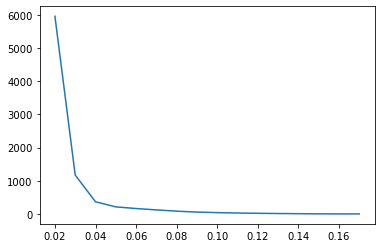

In [16]:
plt.plot(border_list, size_list)

### Визуализируем данные

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
plot_data = []
for i in range(len(bases)):
    plot_data.append(["+".join(bases[i]), "+".join(adds[i])])
    
plot_data

[['LUNCH BAG RED RETROSPOT', 'POSTAGE'],
 ['POSTAGE', 'LUNCH BAG RED RETROSPOT'],
 ['PLASTERS IN TIN CIRCUS PARADE ', 'POSTAGE'],
 ['POSTAGE', 'PLASTERS IN TIN CIRCUS PARADE '],
 ['PLASTERS IN TIN WOODLAND ANIMALS', 'POSTAGE'],
 ['POSTAGE', 'PLASTERS IN TIN WOODLAND ANIMALS'],
 ['POSTAGE', 'RABBIT NIGHT LIGHT'],
 ['RABBIT NIGHT LIGHT', 'POSTAGE'],
 ['POSTAGE', 'RED TOADSTOOL LED NIGHT LIGHT'],
 ['RED TOADSTOOL LED NIGHT LIGHT', 'POSTAGE'],
 ['POSTAGE', 'ROUND SNACK BOXES SET OF4 WOODLAND '],
 ['ROUND SNACK BOXES SET OF4 WOODLAND ', 'POSTAGE'],
 ['SET/6 RED SPOTTY PAPER CUPS', 'SET/6 RED SPOTTY PAPER PLATES'],
 ['SET/6 RED SPOTTY PAPER PLATES', 'SET/6 RED SPOTTY PAPER CUPS']]

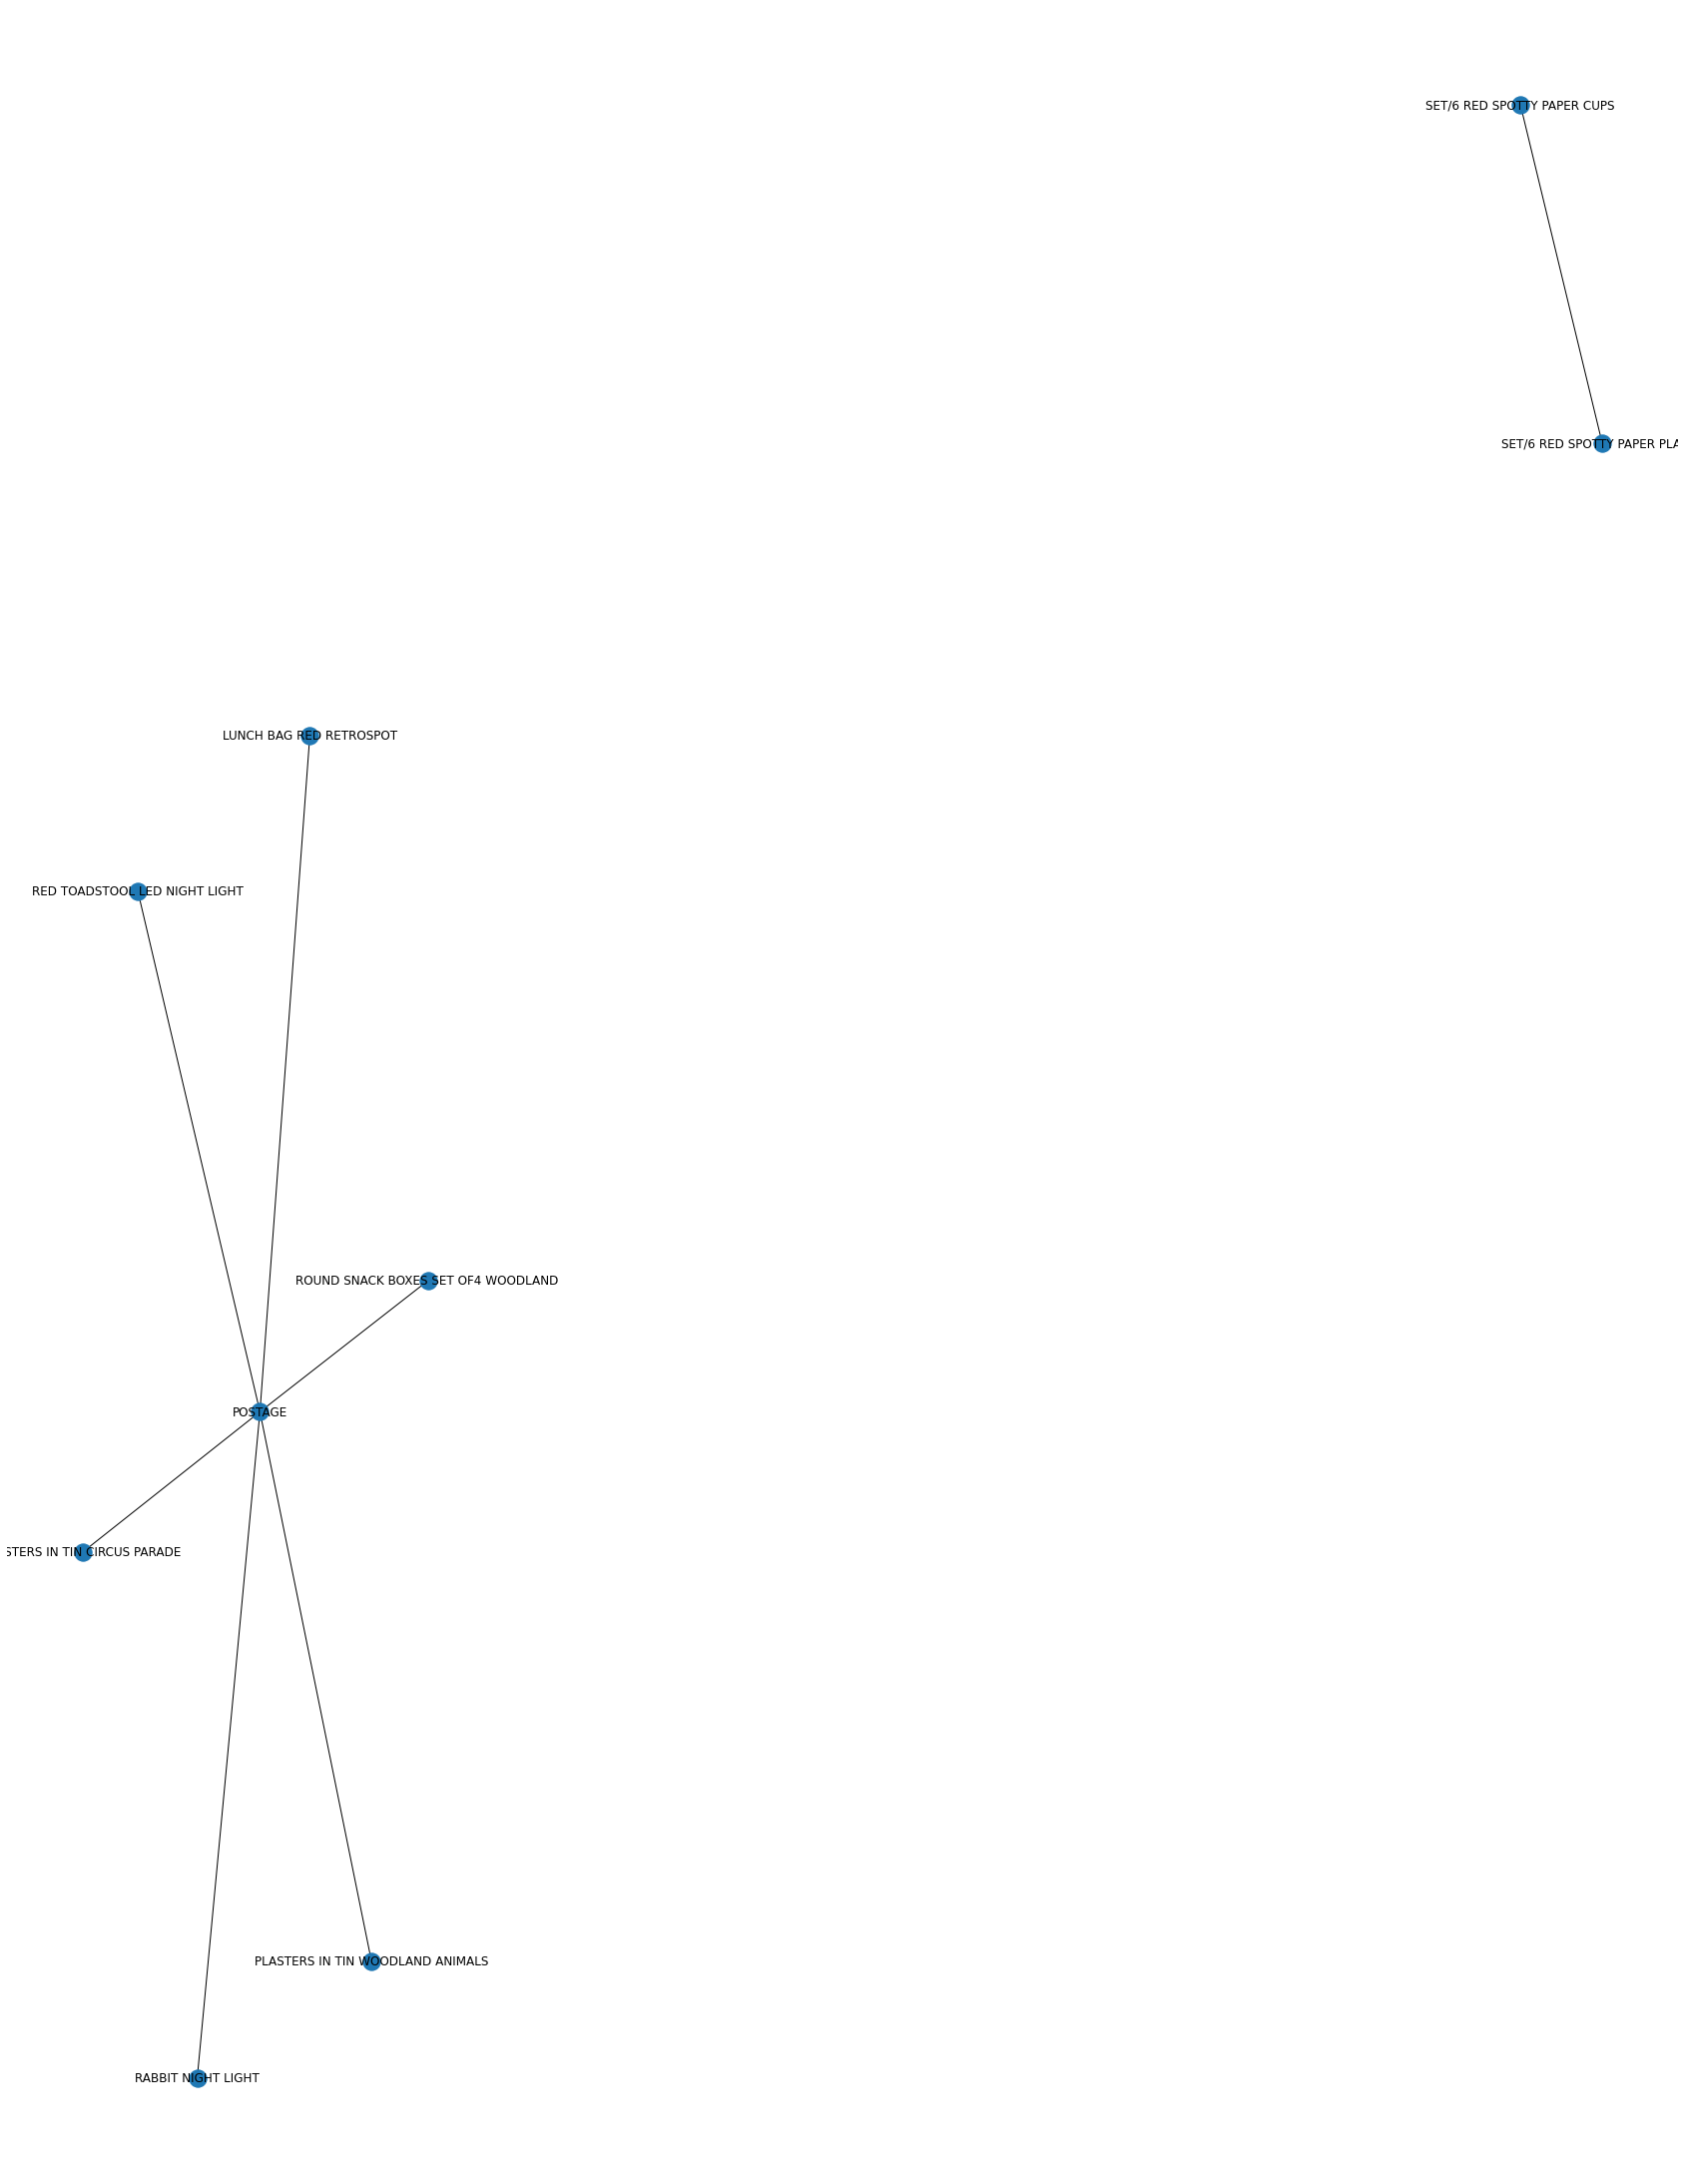

<Figure size 432x288 with 0 Axes>

In [19]:
fig, ax = plt.subplots(figsize=(30,40))
G = nx.Graph()
G.add_edges_from(plot_data)
nx.draw(G, with_labels=True)
plt.show()
plt.savefig('connections.png')

### Все то же самое для Switzerland

In [39]:
data_Switzerland['InvoiceNo'].unique()

array([536858, 539488, 541518, 541569, 542586, 543180, 543181, 'C543773',
       544931, 545034, 545084, 546134, 547815, 548212, 'C549580', 550188,
       550281, 'C550668', 550671, 'C550672', 550899, 'C551587', 552013,
       552329, 555147, 555943, 556415, 'C556635', 558041, 558089, 558639,
       559372, 'C560219', 560245, 561116, 'C561117', 561332, 561898,
       562046, 'C562118', 'C562119', 'C562154', 562882, 'C563224', 563756,
       'C564134', 565785, 566756, 566916, 'C567540', 'C567641', 567642,
       'C567643', 'C567677', 567721, 568650, 568950, 'C569318', 569653,
       570521, 570714, 'C570835', 572567, 572770, 572896, 573286, 573290,
       574740, 575734, 577157, 578099, 'C578122', 578123, 579259],
      dtype=object)

In [40]:
transactions_Switzerland = data_Switzerland.groupby(by='InvoiceNo').apply(lambda x: list(x.Description))
transactions_Switzerland

InvoiceNo
536858     [ROUND SNACK BOXES SET OF4 WOODLAND , PLASTERS...
539488     [HOT WATER BOTTLE BABUSHKA LARGE, CHOCOLATE HO...
541518     [RED RETROSPOT TAPE, CUTE CATS TAPE, STARS GIF...
541569     [ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN...
542586     [STRAWBERRY HONEYCOMB  GARLAND , SMALL POPCORN...
                                 ...                        
C567643                                     [SPOTTY BUNTING]
C567677    [SMALL CERAMIC TOP STORAGE JAR , MEDIUM CERAMI...
C569318    [PICNIC BOXES SET OF 3 RETROSPOT , ROUND SNACK...
C570835                         [STORAGE TIN VINTAGE DOILY ]
C578122                                            [POSTAGE]
Length: 74, dtype: object

In [41]:
min_lift = 0.1  # Минимальный подъем
min_supp = 0.1  # Минимальная поддержка
min_conf = 0.1  # Минимальная уверенность

# Метод априори для поиска ассоциативных правил
ap = list(apriori(transactions=transactions_Switzerland, 
                  min_support=min_supp, 
                  min_confidence=min_conf, 
                  min_lift=min_lift))

lift = []
supp = []
conf = []
bases=[]
adds=[]

In [42]:
for r in ap:
    for x in r.ordered_statistics:
        if list(x.items_base) == []:
            continue
        supp.append(r.support)
        conf.append(x.confidence)
        lift.append(x.lift)
        bases.append(list(x.items_base))
        adds.append(list(x.items_add))
apriori_Switzerland = pd.DataFrame({
    'Поддержка':supp,
    'Уверенность':conf,
    'lift':lift,
    'base':bases,
    'add':adds
})

In [43]:
apriori_Switzerland

Поддержка  Уверенность      lift  \
0    0.108108     0.666667  2.901961   
1    0.108108     0.470588  2.901961   
2    0.135135     0.909091  3.540670   
3    0.135135     0.526316  3.540670   
4    0.121622     0.818182  3.561497   
5    0.121622     0.529412  3.561497   
6    0.175676     0.684211  2.978328   
7    0.175676     0.764706  2.978328   
8    0.135135     0.526316  1.180223   
9    0.135135     0.303030  1.180223   
10   0.121622     0.473684  1.947368   
11   0.121622     0.500000  1.947368   
12   0.135135     0.588235  1.319073   
13   0.135135     0.303030  1.319073   
14   0.121622     0.529412  2.176471   
15   0.121622     0.500000  2.176471   
16   0.108108     0.242424  1.630854   
17   0.108108     0.727273  1.630854   
18   0.108108     0.242424  1.379953   
19   0.108108     0.615385  1.379953   
20   0.162162     0.363636  1.494949   
21   0.162162     0.666667  1.494949   
22   0.108108     0.727273  2.989899   
23   0.108108     0.444444  2.989899   
24   0.108108     1.000000  4.111111   
25   0.108108     0.444444  4.111111   
26   0.121622     0.900000  3.700000   
27   0.121622     0.500000  3.700000   
28   0.108108     0.727273  4.139860   
29   0.108108     0.421053  3.461988   
30   0.108108     0.470588  3.482353   
31   0.108108     0.800000  3.482353   
32   0.108108     0.888889  3.461988   
33   0.108108     0.615385  4.139860   
34   0.108108     0.421053  3.115789   
35   0.108108     0.470588  3.482353   
36   0.108108     0.242424  1.379953   
37   0.108108     0.615385  1.379953   
38   0.108108     0.800000  3.482353   
39   0.108108     0.800000  3.115789   

                                                 base  \
0                       [CHILDRENS CUTLERY SPACEBOY ]   
1                  [PLASTERS IN TIN WOODLAND ANIMALS]   
2                    [PLASTERS IN TIN CIRCUS PARADE ]   
3                          [PLASTERS IN TIN SPACEBOY]   
4                    [PLASTERS IN TIN CIRCUS PARADE ]   
5                  [PLASTERS IN TIN WOODLAND ANIMALS]   
6                          [PLASTERS IN TIN SPACEBOY]   
7                  [PLASTERS IN TIN WOODLAND ANIMALS]   
8                          [PLASTERS IN TIN SPACEBOY]   
9                                           [POSTAGE]   
10                         [PLASTERS IN TIN SPACEBOY]   
11              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
12                 [PLASTERS IN TIN WOODLAND ANIMALS]   
13                                          [POSTAGE]   
14                 [PLASTERS IN TIN WOODLAND ANIMALS]   
15              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
16                                          [POSTAGE]   
17                         [RED RETROSPOT MINI CASES]   
18                                          [POSTAGE]   
19                         [REGENCY CAKESTAND 3 TIER]   
20                                          [POSTAGE]   
21              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
22                         [RED RETROSPOT MINI CASES]   
23              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
24                    [RED TOADSTOOL LED NIGHT LIGHT]   
25              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
26               [ROUND SNACK BOXES SET OF 4 FRUITS ]   
27              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
28                   [PLASTERS IN TIN CIRCUS PARADE ]   
29                         [PLASTERS IN TIN SPACEBOY]   
30                 [PLASTERS IN TIN WOODLAND ANIMALS]   
31  [PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR...   
32  [PLASTERS IN TIN CIRCUS PARADE , PLASTERS IN T...   
33  [PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...   
34                         [PLASTERS IN TIN SPACEBOY]   
35                 [PLASTERS IN TIN WOODLAND ANIMALS]   
36                                          [POSTAGE]   
37  [PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...   
38                [PLASTERS IN TIN SPACEBOY, POSTAGE]   
39        [POSTAGE, PLASTERS IN TIN WOODLAND ANIMALS]   

                         

In [44]:
plot_data = []
for i in range(len(bases)):
    plot_data.append(["+".join(bases[i]), "+".join(adds[i])])
    
plot_data

[['CHILDRENS CUTLERY SPACEBOY ', 'PLASTERS IN TIN WOODLAND ANIMALS'],
 ['PLASTERS IN TIN WOODLAND ANIMALS', 'CHILDRENS CUTLERY SPACEBOY '],
 ['PLASTERS IN TIN CIRCUS PARADE ', 'PLASTERS IN TIN SPACEBOY'],
 ['PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN CIRCUS PARADE '],
 ['PLASTERS IN TIN CIRCUS PARADE ', 'PLASTERS IN TIN WOODLAND ANIMALS'],
 ['PLASTERS IN TIN WOODLAND ANIMALS', 'PLASTERS IN TIN CIRCUS PARADE '],
 ['PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN WOODLAND ANIMALS'],
 ['PLASTERS IN TIN WOODLAND ANIMALS', 'PLASTERS IN TIN SPACEBOY'],
 ['PLASTERS IN TIN SPACEBOY', 'POSTAGE'],
 ['POSTAGE', 'PLASTERS IN TIN SPACEBOY'],
 ['PLASTERS IN TIN SPACEBOY', 'ROUND SNACK BOXES SET OF4 WOODLAND '],
 ['ROUND SNACK BOXES SET OF4 WOODLAND ', 'PLASTERS IN TIN SPACEBOY'],
 ['PLASTERS IN TIN WOODLAND ANIMALS', 'POSTAGE'],
 ['POSTAGE', 'PLASTERS IN TIN WOODLAND ANIMALS'],
 ['PLASTERS IN TIN WOODLAND ANIMALS', 'ROUND SNACK BOXES SET OF4 WOODLAND '],
 ['ROUND SNACK BOXES SET OF4 WOODLAND ', 'PLASTE

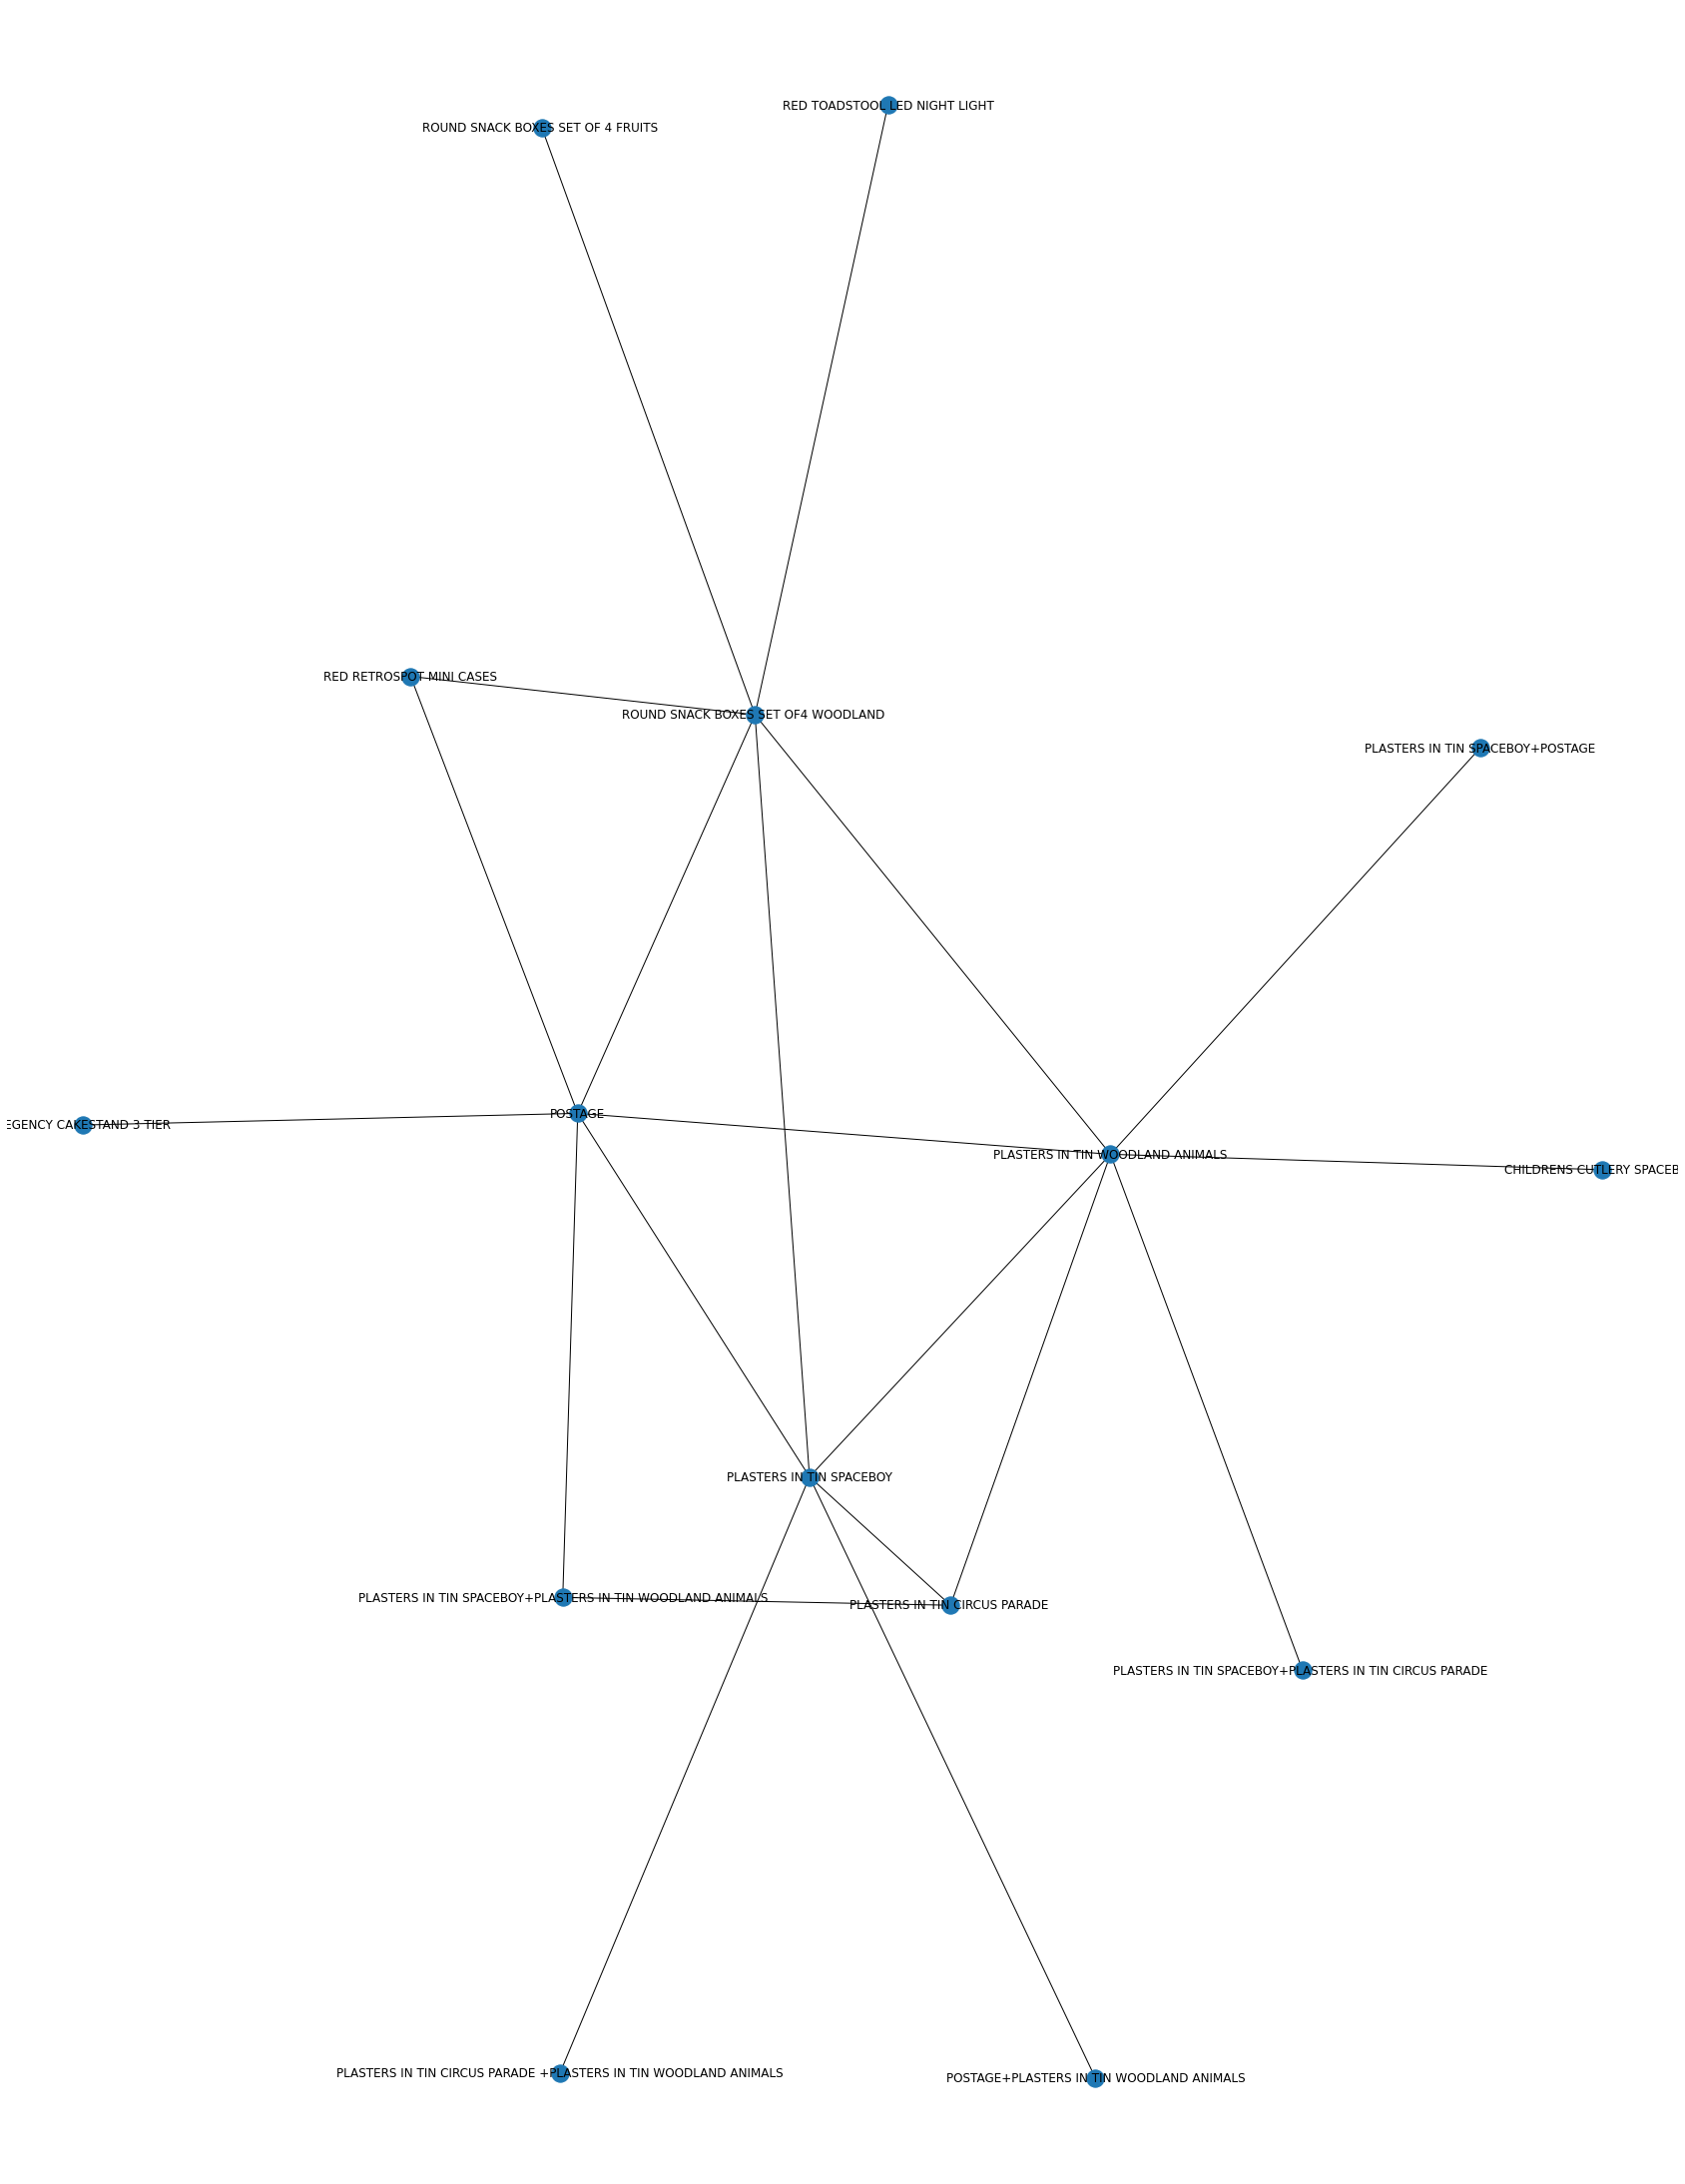

<Figure size 432x288 with 0 Axes>

In [45]:
fig, ax = plt.subplots(figsize=(30,40))
G = nx.Graph()
G.add_edges_from(plot_data)
nx.draw(G, with_labels=True)
plt.show()
plt.savefig('connections_2.png')

### Сравним какнибудь...

In [46]:
apriori_france

Поддержка  Уверенность      lift                                   base  \
0    0.104121     0.786885  1.166412              [LUNCH BAG RED RETROSPOT]   
1    0.104121     0.154341  1.166412                              [POSTAGE]   
2    0.125813     0.852941  1.264328       [PLASTERS IN TIN CIRCUS PARADE ]   
3    0.125813     0.186495  1.264328                              [POSTAGE]   
4    0.117137     0.805970  1.194702     [PLASTERS IN TIN WOODLAND ANIMALS]   
5    0.117137     0.173633  1.194702                              [POSTAGE]   
6    0.140998     0.209003  1.284673                              [POSTAGE]   
7    0.140998     0.866667  1.284673                   [RABBIT NIGHT LIGHT]   
8    0.134490     0.199357  1.276438                              [POSTAGE]   
9    0.134490     0.861111  1.276438        [RED TOADSTOOL LED NIGHT LIGHT]   
10   0.125813     0.186495  1.343348                              [POSTAGE]   
11   0.125813     0.906250  1.343348  [ROUND SNACK BOXES SET OF4 WOODLAND ]   
12   0.104121     0.888889  8.195556          [SET/6 RED SPOTTY PAPER CUPS]   
13   0.104121     0.960000  8.195556        [SET/6 RED SPOTTY PAPER PLATES]   

                                      add  
0                               [POSTAGE]  
1               [LUNCH BAG RED RETROSPOT]  
2                               [POSTAGE]  
3        [PLASTERS IN TIN CIRCUS PARADE ]  
4                               [POSTAGE]  
5      [PLASTERS IN TIN WOODLAND ANIMALS]  
6                    [RABBIT NIGHT LIGHT]  
7                               [POSTAGE]  
8         [RED TOADSTOOL LED NIGHT LIGHT]  
9                               [POSTAGE]  
10  [ROUND SNACK BOXES SET OF4 WOODLAND ]  
11                              [POSTAGE]  
12        [SET/6 RED SPOTTY PAPER PLATES]  
13          [SET/6 RED SPOTTY PAPER CUPS]

In [47]:
apriori_Switzerland

Поддержка  Уверенность      lift  \
0    0.108108     0.666667  2.901961   
1    0.108108     0.470588  2.901961   
2    0.135135     0.909091  3.540670   
3    0.135135     0.526316  3.540670   
4    0.121622     0.818182  3.561497   
5    0.121622     0.529412  3.561497   
6    0.175676     0.684211  2.978328   
7    0.175676     0.764706  2.978328   
8    0.135135     0.526316  1.180223   
9    0.135135     0.303030  1.180223   
10   0.121622     0.473684  1.947368   
11   0.121622     0.500000  1.947368   
12   0.135135     0.588235  1.319073   
13   0.135135     0.303030  1.319073   
14   0.121622     0.529412  2.176471   
15   0.121622     0.500000  2.176471   
16   0.108108     0.242424  1.630854   
17   0.108108     0.727273  1.630854   
18   0.108108     0.242424  1.379953   
19   0.108108     0.615385  1.379953   
20   0.162162     0.363636  1.494949   
21   0.162162     0.666667  1.494949   
22   0.108108     0.727273  2.989899   
23   0.108108     0.444444  2.989899   
24   0.108108     1.000000  4.111111   
25   0.108108     0.444444  4.111111   
26   0.121622     0.900000  3.700000   
27   0.121622     0.500000  3.700000   
28   0.108108     0.727273  4.139860   
29   0.108108     0.421053  3.461988   
30   0.108108     0.470588  3.482353   
31   0.108108     0.800000  3.482353   
32   0.108108     0.888889  3.461988   
33   0.108108     0.615385  4.139860   
34   0.108108     0.421053  3.115789   
35   0.108108     0.470588  3.482353   
36   0.108108     0.242424  1.379953   
37   0.108108     0.615385  1.379953   
38   0.108108     0.800000  3.482353   
39   0.108108     0.800000  3.115789   

                                                 base  \
0                       [CHILDRENS CUTLERY SPACEBOY ]   
1                  [PLASTERS IN TIN WOODLAND ANIMALS]   
2                    [PLASTERS IN TIN CIRCUS PARADE ]   
3                          [PLASTERS IN TIN SPACEBOY]   
4                    [PLASTERS IN TIN CIRCUS PARADE ]   
5                  [PLASTERS IN TIN WOODLAND ANIMALS]   
6                          [PLASTERS IN TIN SPACEBOY]   
7                  [PLASTERS IN TIN WOODLAND ANIMALS]   
8                          [PLASTERS IN TIN SPACEBOY]   
9                                           [POSTAGE]   
10                         [PLASTERS IN TIN SPACEBOY]   
11              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
12                 [PLASTERS IN TIN WOODLAND ANIMALS]   
13                                          [POSTAGE]   
14                 [PLASTERS IN TIN WOODLAND ANIMALS]   
15              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
16                                          [POSTAGE]   
17                         [RED RETROSPOT MINI CASES]   
18                                          [POSTAGE]   
19                         [REGENCY CAKESTAND 3 TIER]   
20                                          [POSTAGE]   
21              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
22                         [RED RETROSPOT MINI CASES]   
23              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
24                    [RED TOADSTOOL LED NIGHT LIGHT]   
25              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
26               [ROUND SNACK BOXES SET OF 4 FRUITS ]   
27              [ROUND SNACK BOXES SET OF4 WOODLAND ]   
28                   [PLASTERS IN TIN CIRCUS PARADE ]   
29                         [PLASTERS IN TIN SPACEBOY]   
30                 [PLASTERS IN TIN WOODLAND ANIMALS]   
31  [PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR...   
32  [PLASTERS IN TIN CIRCUS PARADE , PLASTERS IN T...   
33  [PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...   
34                         [PLASTERS IN TIN SPACEBOY]   
35                 [PLASTERS IN TIN WOODLAND ANIMALS]   
36                                          [POSTAGE]   
37  [PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...   
38                [PLASTERS IN TIN SPACEBOY, POSTAGE]   
39        [POSTAGE, PLASTERS IN TIN WOODLAND ANIMALS]   

                         

## Вывод:
### Данные похожи, почему-то при большем числе данных, у Франции правил больше. Паутинка тоже больше (А че еще сказать то, я так понимаю границы для поддержки нужно было поставить поменьше)